# Project: Data Science Blog Post based on an Airbnb Berlin Data Set

## 1. Business Understanding

In this project an Airbnb Berlin data set wil be analyzed. The following questions shall be answered:

- 1. How do price densities and distributions differ in disctricts and what does that tell us?
- 2. Are there places to book at the periphery of Berlin and where can the most expensive places be found?
- 3. What are the districts with most listings?

## 2. Data Understanding

### 2.1 Gather Data

In [1]:
# Import and adjust necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load chosen data set
df = pd.read_csv('./listings_summary.csv')

### 2.2 Assess Data

In [2]:
# Take a first look at the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83,63,147,2021-01-01,0.89,1,280,0,First name and Last name: Nicolas Krotz Conta...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.09,1,0,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,93,26,2021-06-21,0.17,4,139,0,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90,93,48,2017-12-14,0.31,2,143,0,NaN
4,57049,130 sqm with a view on Mauer Park,54283,Marine,Pankow,Prenzlauer Berg Nordwest,52.54758,13.40632,Entire home/apt,280,3,114,2022-10-23,0.78,3,134,15,03/Z/RA/003544-18


## 3. Prepare Data

### 3.1 Clean Data

In [3]:
# Create data frame with only columns that are of interest for our investigation.
df = df.filter(['neighbourhood_group','latitude','longitude','price'], axis=1)

# Create data frame with price values more than 20 Euros and less than 200 Euros. Thus extremes are not considered.
df = df[(df.price>20) & (df.price<200)]

# Check if columns contain missing data.
df.isnull().sum()

neighbourhood_group    0
latitude               0
longitude              0
price                  0
dtype: int64

Columns of interest do not contain missing values. Thus there is no further need for data cleaning.

## 4. Evaluation

### 4.1. How do price densities and distributions differ in disctricts and what does that tell us?

#### 4.1.1 Analyze and Visualize Data

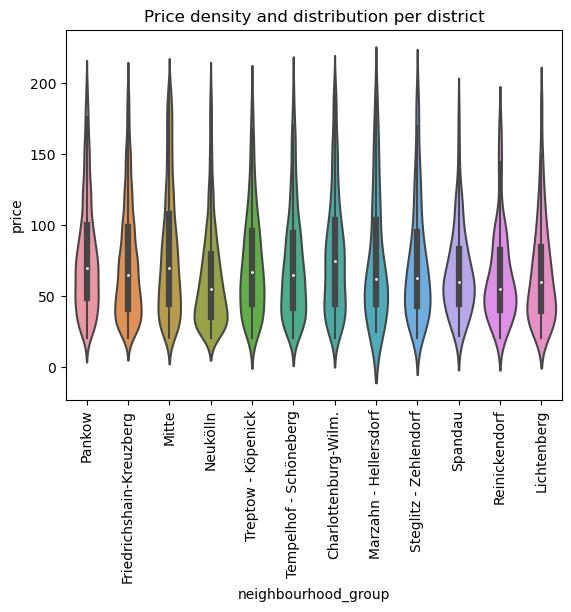

In [4]:
# Use violinplot to show price density and distribution
violins=sns.violinplot(data=df, x='neighbourhood_group', y='price')
violins.set_xticklabels(violins.get_xticklabels(), rotation=90)
violins.set_title('Price density and distribution per district');

#### 4.1.2. Interpretation of violin plot:
- Many expensive objects can found in central and expensive districts such as Mitte, Charlottenburg-Wilmersdorf and Pankow.
- Although containing central and lively neighbourhoods, many rather cheap places can be found in Neukölln.

### 4.2. Are there places to book at the periphery of Berlin and where can the most expensive places be found?

#### 4.2.1 Let's draw a scatter plot to show the geographic distribution of expensive and less expensive Airbnb places within Berlin

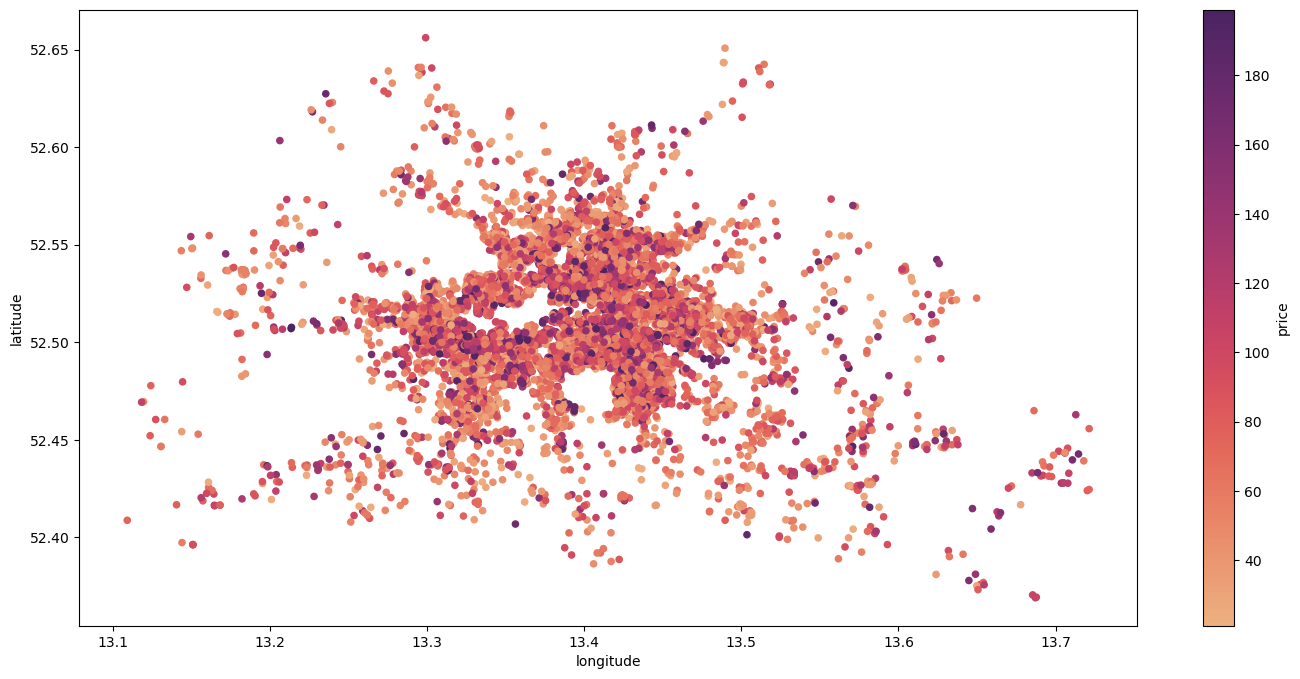

In [5]:
# Calculate the height-width-ratio to draw a map with correct proportions
spread_longitude = max(df['longitude']) - min(df['longitude'])
spread_latitude  = max(df['latitude'])  - min(df['latitude'])
ratio = spread_longitude / spread_latitude
size = 8

# Draw a map with scatter plot
scatter = df.plot(kind='scatter', 
                 x='longitude', 
                 y='latitude', 
                 c='price', 
                 cmap=plt.get_cmap('flare'), 
                 figsize=(ratio*size, size))

#### 4.2.2. Interpretation of scatter plot:

- According to the map there are several places to book at the periphery of Berlin.
- The most expensive places can be found in central neighbourhoods. 
- Nonetheless you can also find expensive places at the periphery.

### 4.3. What are the districts with most listings?

#### 4.3.1 Let's draw a horizontal bar chart to answer that question

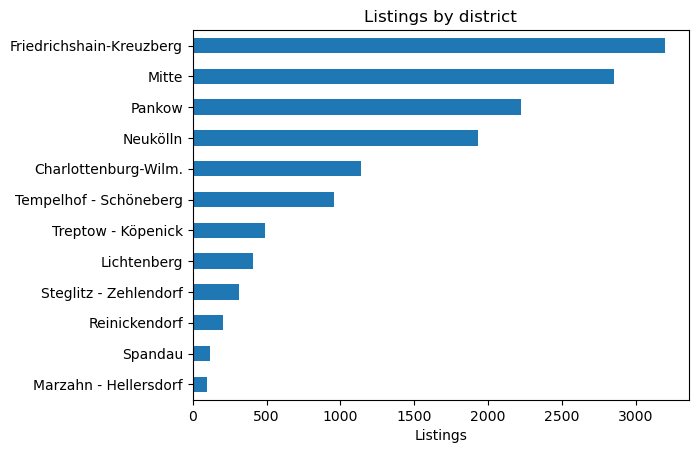

In [6]:
# Define the plotting function
def draw_horizontal_bars(column_name, title, x_label):
    '''
    This function counts the values of a given column, 
    sort is from top to bottom and draws a horizonzal bar chart.
    
    Input:
        column name, chart title, x axis label
    Output:
        bar chart
    '''
    listings = df[column_name].value_counts().sort_values(ascending=True)
    listings.plot.barh()
    plt.title(title)
    plt.xlabel(x_label)
    plt.show()
    
# Call function
column_name = 'neighbourhood_group'
title = "Listings by district"
x_label = 'Listings'

draw_horizontal_bars(column_name, title, x_label)

#### 4.3.2 Interpretation of bar plot:
- The district with most listings is Friedrichshain-Kreuzberg, followed by other districts with central neighbourhoods. 
- Periphery districts have far less listings.